In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns

### loading datasets

In [2]:
product=pd.read_csv("Products.csv")

In [3]:
customer=pd.read_csv("Customers.csv")

In [4]:
transaction=pd.read_csv("Transactions.csv")

### inspecting datasets

In [11]:
product.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [15]:
product.tail()

,ProductID,ProductName,Category,Price
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29
99,P100,HomeSense Sweater,Clothing,126.34


In [41]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [17]:
product.shape

(100, 4)

In [19]:
product.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [23]:
product.columns


Index(['ProductID', 'ProductName', 'Category', 'Price'], dtype='object')

In [25]:
product.nunique()

ProductID      100
ProductName     66
Category         4
Price          100
dtype: int64

In [27]:
product['Category'].unique()

array(['Books', 'Electronics', 'Home Decor', 'Clothing'], dtype=object)

In [29]:
product['ProductName'].unique()

array(['ActiveWear Biography', 'ActiveWear Smartwatch',
       'ComfortLiving Biography', 'BookWorld Rug', 'TechPro T-Shirt',
       'ActiveWear Rug', 'SoundWave Cookbook',
       'BookWorld Bluetooth Speaker', 'BookWorld Wall Art',
       'ComfortLiving Smartwatch', 'SoundWave Desk Lamp',
       'ComfortLiving Headphones', 'BookWorld Smartwatch',
       'ActiveWear Jacket', 'HomeSense Headphones',
       'ActiveWear Running Shoes', 'ActiveWear Textbook',
       'ComfortLiving Mystery Book', 'ComfortLiving Sweater',
       'SoundWave Rug', 'HomeSense Wall Art', 'ActiveWear Cookware Set',
       'SoundWave Bluetooth Speaker', 'SoundWave Headphones',
       'HomeSense Desk Lamp', 'TechPro Headphones', 'ActiveWear Cookbook',
       'BookWorld Cookbook', 'HomeSense T-Shirt', 'ActiveWear T-Shirt',
       'BookWorld Jacket', 'SoundWave Smartwatch', 'TechPro Vase',
       'TechPro Smartwatch', 'SoundWave Mystery Book',
       'ComfortLiving Smartphone', 'ActiveWear Headphones',
       'SoundW

In [47]:
print("\nTransactions Dataset:")
print(transaction.head())



Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


In [49]:
print(transaction.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None


In [53]:
print("Customers Dataset:")
print(customer.head())
print(customer.info())


Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None


### Check for missing values

In [67]:
print("\nMissing Values:")
print("Customer:", customer.isnull().sum())



Missing Values:
Customer: CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [69]:
print("Product:", product.isnull().sum())


Product: ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


In [71]:

print("Transaction:", transaction.isnull().sum())

Transaction: TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


### Merge datasets


In [78]:
merged = transaction.merge(product, on="ProductID", how="left")
merged = merged.merge(customer, on="CustomerID", how="left")


In [80]:
print("\nMerged Dataset:")
print(merged.head())


Merged Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x                      ProductName     Category  Price_y  \
0      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
1      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
2      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
3      601.36   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
4      902.04   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   

      CustomerName         Region  SignupDate  
0   Andrea Jenkins   

### Sales by Region


In [83]:
region_sales = merged.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
print("\nSales by Region:")
print(region_sales)


Sales by Region:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


### Visualize sales by region


In [88]:
import matplotlib.pyplot as plt

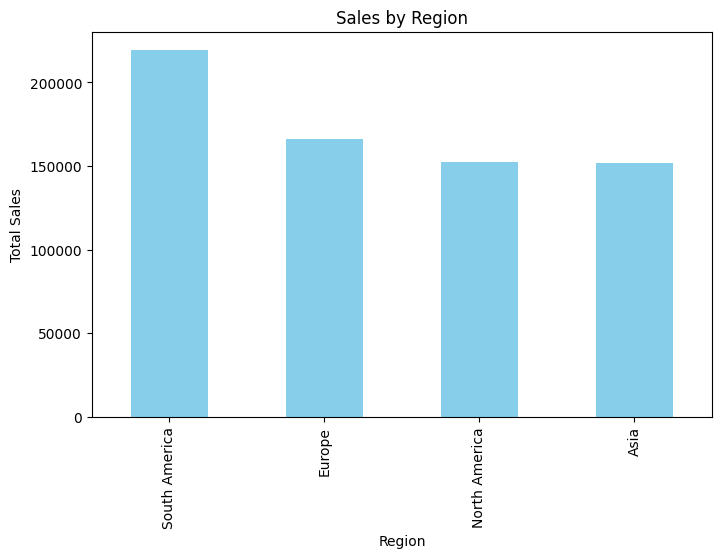

In [90]:
plt.figure(figsize=(8, 5))
region_sales.plot(kind='bar', color='skyblue')
plt.title("Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()

### Product performance

In [94]:
product_performance = merged.groupby("ProductID")["TotalValue"].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Products by Sales:")
print(product_performance)


Top 10 Products by Sales:
ProductID
P029    19513.80
P079    17946.91
P048    17905.20
P020    15060.92
P062    14592.24
P059    13947.20
P039    13778.88
P083    13671.60
P019    13487.95
P041    13232.12
Name: TotalValue, dtype: float64


### Visualize product performance

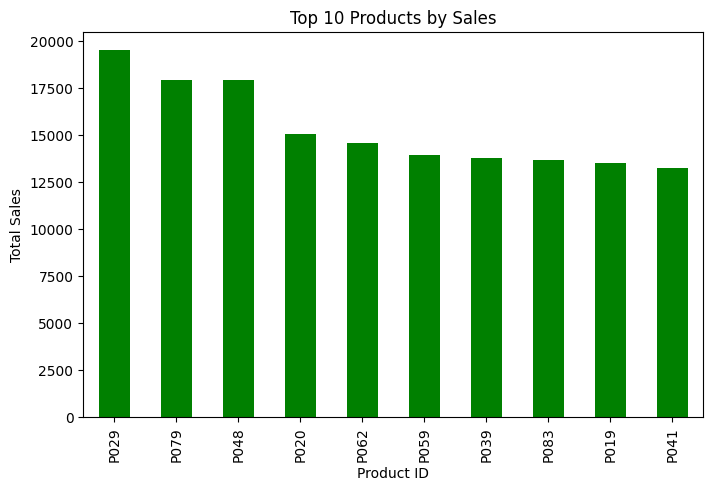

In [96]:
plt.figure(figsize=(8, 5))
product_performance.plot(kind='bar', color='green')
plt.title("Top 10 Products by Sales")
plt.xlabel("Product ID")
plt.ylabel("Total Sales")
plt.show()

### Heatmap to identify correlations


In [109]:
for column in merged.columns:
    merged[column] = pd.to_numeric(merged[column], errors='coerce')




In [111]:
numeric_data = merged.select_dtypes(include=[float, int])


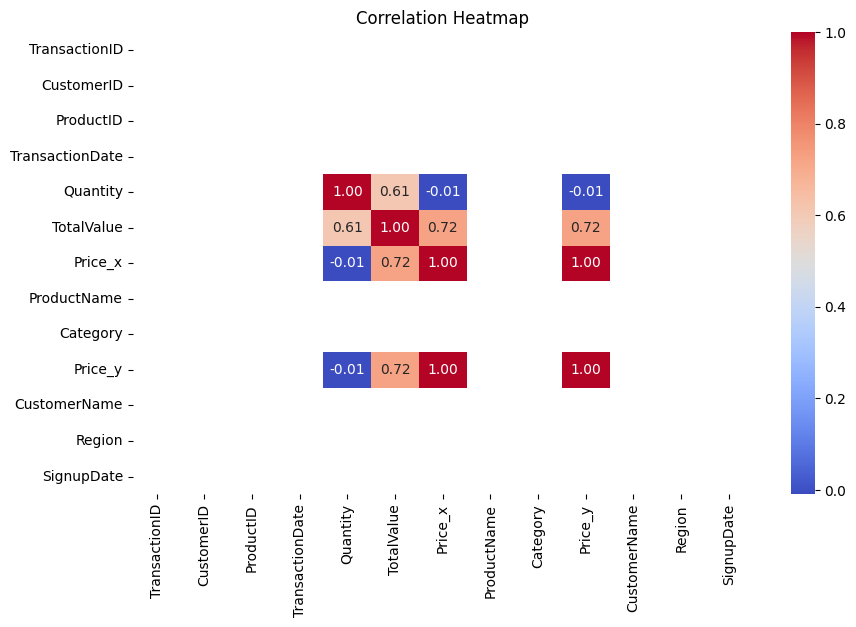

In [113]:
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()